# EDA

Exploratory data analysis is the first and foremost step to analyse any kind of data. Rather than a specific set of procedures, EDA is an approach, or a philosophy, which seeks to explore the most important and often hidden patterns in a data set.

#### The analysis is divided into four main parts

    1. Data Sourcing
    2. Data understanding
    3. Data cleaning
        a. Identifying missing value 
        b. Cleaning missing values
        c. Removing redundant columns
        d. Correcting column data type
    4. Data Analysis
    5. Recommendations

In [906]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',120)
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format


 # 1. Data Sourcing

In [907]:
# Load data to pandas dataframe
lending_loan_url = '/Users/balwant/Documents/Machine_Learning_and_AI/Assignment/Lending_Club-Case_Study/dataFiles/loan.csv'
lending_loan = pd.read_csv(lending_loan_url,encoding = "ISO-8859-1", low_memory=False)

# 2. Data Understanding

In [908]:
# Firstly, let's have a look at the dimension of data
lending_loan.shape

(39717, 111)

In [909]:
# Let's have a look at the first few rows of the Data
lending_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

In [910]:
# Let's have a look at all the column names
list(lending_loan.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

Some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

The target variable, which we want to compare across the independent variables, is loan status. The strategy is to figure out and compare the average default rates across various independent variables and identify the ones that affect default rate the most.

In [911]:
# Let's see some insight about data.
lending_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","14,035.00","2,786.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,661.00",0.00,"39,717.00",0.00,0.00,0.00,"39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,661.00","39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,35.90,69.70,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,22.02,43.82,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,18.00,22.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,34.00,90.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,

# Data Cleaning

Few columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [912]:
# Let's check number of missing value per column.
def findMissingValueCountPerCols(lending_loan):
    number_of_missing_value_per_column = lending_loan.isnull().sum()
    return number_of_missing_value_per_column.loc[number_of_missing_value_per_column > 0]
findMissingValueCountPerCols(lending_loan)

emp_title                          2459
emp_length                         1075
desc                              12940
title                                11
mths_since_last_delinq            25682
mths_since_last_record            36931
revol_util                           50
last_pymnt_d                         71
next_pymnt_d                      38577
last_credit_pull_d                    2
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717


In [913]:
# Analysing missing values per column in percentage.
def findMissingValuePercentPerCols(lending_loan):
    missing_values_per_column = round(100 * lending_loan.isnull().sum()/len(lending_loan),2)
    return missing_values_per_column.loc[missing_values_per_column > 0]
findMissingValuePercentPerCols(lending_loan)

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


It's seems there are many column in data having 100% missing values. These column won't add any value in analysis.
If we have these column in data it's consuming memory while loading data,
So it will be better to remove those columns which having 90% or obove missing values.

In [914]:
# Getting all column which having 90% or obove missing value.
def findMissingValueCols(leading_loan):
    missing_value_columns = round(100*(leading_loan.isnull().sum()/len(lending_loan)),2)
    return list(missing_value_columns[missing_value_columns >= 90].index)

findMissingValueCols(lending_loan)

['mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percen

There are many columns in the data with 100% missing values. Let's get rid of the columns having more than 90% missing values.


In [915]:
#Number of columns that have 90% or above missing values
len(findMissingValueCols(lending_loan))

56

In given dataset 56 columns that having more then 90% values as missing. Let's Remove such columns as these columns clearly add noise and won't help in analysis.

In [916]:
lending_loan = lending_loan.drop(findMissingValueCols(lending_loan), axis = 1)
lending_loan.shape

(39717, 55)

After removing missing value from columns.We have left 55 columns.
Let's check further for missing values after removing columns that had 90% or above mising values.

In [917]:
#Let's checking further for missing value count per column.
findMissingValueCountPerCols(lending_loan)

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
revol_util                       50
last_pymnt_d                     71
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [918]:
#Let's check further for missing value percentage per column.
findMissingValuePercentPerCols(lending_loan)

emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
mths_since_last_delinq       64.66
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

As we see after removing 90% and above missing value from dataset there are two column 'desc' and 'mths_since_last_delinq' have 32.58% and 64.66% missing value respectively

In [919]:
#Let's have a look at some entries of 'desc' and 'mths_since_last_delinq' columns
lending_loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,nan
1,Borrower added on 12/22/11 > I plan to use t...,nan
2,NaN,nan
3,Borrower added on 12/21/11 > to pay for prop...,35.00
4,Borrower added on 12/21/11 > I plan on combi...,38.00


The description column contains the comments which applicant had written while applying for the loan. Although one can use some text analysis techniques to derive new features from this column (such as sentiment, number of positive/negative words etc.), we will not use this column in our analysis.

So we can remove the desc column as an equivalent short and consise information is present in the purpose and title column of the data.

Secondly, We will not use 'mths_since_last_delinq' column, Since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval.

Thus we can drop the these two (desc, mths_since_last_delinq) columns.

In [920]:
#Let's drop 2 columns 'desc' and 'mths_since_last_delinq'
lending_loan = lending_loan.drop(['desc','mths_since_last_delinq'],axis = 1)

In [921]:
#Let's check further for missing value count per column.
findMissingValueCountPerCols(lending_loan)

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

In [922]:
#Let's check further for missing value percentage per column.
findMissingValuePercentPerCols(lending_loan)

emp_title                    6.19
emp_length                   2.71
title                        0.03
revol_util                   0.13
last_pymnt_d                 0.18
last_credit_pull_d           0.01
collections_12_mths_ex_med   0.14
chargeoff_within_12_mths     0.14
pub_rec_bankruptcies         1.75
tax_liens                    0.10
dtype: float64

In [923]:
#Checking for unique values count that each columns have
def findUniqueValuePerCols(lending_loan):
    return lending_loan.nunique().sort_values()

findUniqueValuePerCols(lending_loan)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

As we see above there are lots of column like('tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan', 'term', 'pub_rec_bankruptcies', 'verification_status', 'loan_status') that have only 1 or  2 or 3 unique values, So they are seems to be Categorical columns. Let's have a look on these columns.

In [924]:
#Checking and exploring the categorical columns
lending_loan.loc[:,lending_loan.nunique() <= 5].head()

,term,home_ownership,verification_status,loan_status,pymnt_plan,pub_rec,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,36 months,RENT,Verified,Fully Paid,n,0,f,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,60 months,RENT,Source Verified,Charged Off,n,0,f,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,36 months,RENT,Not Verified,Fully Paid,n,0,f,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,36 months,RENT,Source Verified,Fully Paid,n,0,f,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,60 months,RENT,Source Verified,Current,n,0,f,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


Let's take a look at all the different values of these Categorical columns one by one

In [925]:
# let's define a methods that take column as parameter and return unique value as a list for each column.
def findUniqueValueforCol(pymnt_plan):
    return list(pymnt_plan.unique())

In [926]:
# Finding unique value for column 'pymnt_plan'
findUniqueValueforCol(lending_loan['pymnt_plan'])

['n']

Since 'pymnt_plan column' is having only one unique value, It won't add any value in our analysis, So we can drop this column

In [927]:
# Finding unique value for column 'initial_list_status'
findUniqueValueforCol(lending_loan['initial_list_status'])

['f']

Since 'initial_list_status column' is also having only one unique value, It won't add any value in our analysis, So we can drop this column

In [928]:
# Finding unique value for column 'collections_12_mths_ex_med'
findUniqueValueforCol(lending_loan['collections_12_mths_ex_med'])

[0.0, nan]

column 'collections_12_mths_ex_med' is having only two unique value, "0" and "nan" It won't add any value in our analysis, So we can drop this column

In [929]:
# Finding unique value for column 'policy_code'
findUniqueValueforCol(lending_loan['policy_code'])

[1]

This 'policy_code' column also having only one unique value, It won't add any value in our analysis, So we can drop this column

In [930]:
# Finding unique value for column 'acc_now_delinq'
findUniqueValueforCol(lending_loan['acc_now_delinq'])

[0]

'acc_now_delinq' having only one unique value, It won't add any value in our analysis, So we can drop this column

In [931]:
# Finding unique value for column 'collections_12_mths_ex_med'
findUniqueValueforCol(lending_loan['collections_12_mths_ex_med'])

[0.0, nan]

'chargeoff_within_12_mths' column having only two unique value, "0" and "nan" It won't add any value in our analysis, So we can drop this column

In [932]:
# Finding unique value for column 'chargeoff_within_12_mths'
findUniqueValueforCol(lending_loan['chargeoff_within_12_mths'])

[0.0, nan]

'chargeoff_within_12_mths' column having only two unique value, "0" and "nan" It won't add any value in our analysis, So we can drop this column

In [933]:
# Finding unique value for column 'tax_liens'
findUniqueValueforCol(lending_loan['tax_liens'])

[0.0, nan]

'tax_liens' column having only two unique value, "0" and "nan" It's won't add any value in our analysis, So we can drop this column


In [934]:
# Finding unique value for column 'delinq_amnt'
findUniqueValueforCol(lending_loan['delinq_amnt'])

[0]

'delinq_amnt' having only one unique value, It won't add any value in our analysis, So we can drop this column

A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file.
Let's use this file to get a better understanding of the 56 columns we are left with.
This will help to further narrow down on the columns.

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to our analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

These columns are:

### id :
'id'is a random number given to the loan, does not contribute to analysis.

### member_id :
'member_id'is a random number, does not contribute to analysis.

### pymnt_plan:
policy_code' column value for entire dataset is 'n', therefore can be removed.

### url :
URL for LC page for corresponding to each memberid, will not help in analysis to be removed.

### zip_code :
first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis.

### initial_list_status :
'initial_list_status' column having only 'f' out of the possible values, therefore can be removed.

### collections_12_mths_ex_med :
'collections_12_mths_ex_med' column having only two unique value, "0" and "nan" It's won't add any value in our analysis, So we can drop this column

### chargeoff_within_12_mths :
'chargeoff_within_12_mths' column having only two unique value, "0" and "nan" It's won't add any value in our analysis, So we can drop this column

### policy_code :
'policy_code' column value for entire dataset is '0' '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.

### application_type :
value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.

### acc_now_delinq :
'acc_now_delinq' column value for entire dataset is '0', therefore can be removed.

### delinq_amnt :
'delinq_amnt' column value for entire dataset is '0', therefore can be removed.

### funded_amnt :
value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.

### tax_liens :
'tax_liens' column having only two unique value, "0" and "nan" It's won't add any value in our analysis, So we can drop this column

### funded_amnt_inv :
'funded_amnt_inv' column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.

Dropping the above columns from the clean_loan dataframe.

In [935]:
drop_columns = ['id','member_id','pymnt_plan','url','zip_code', 'initial_list_status','collections_12_mths_ex_med',
                'chargeoff_within_12_mths', 'policy_code', 'application_type','acc_now_delinq', 'delinq_amnt', 'funded_amnt',
               'tax_liens', 'funded_amnt_inv']
lending_loan = lending_loan.drop(drop_columns, axis = 1)
lending_loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.00
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,"47,004.00",Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,"10,110.84","10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,May-16,"1,313.76",May-16,0.00
7,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,"48,000.00",Source Verified,Dec-11,Fully Paid,car,Car Downpayment,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.00,0.00,"3,939.14","3,939.14","3,000.00",939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.00
8,5600,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,"40,000.00",Source Verified,Dec-11,Charged Off,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0.00
9,5375,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,"15,000.00",Verified,Dec-11,Charged Off,other,Building my credit history.,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.00,0.00,"1,476.19","1,469.34",673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.00


In [936]:
#Let's check further for missing value count per column.
findMissingValueCountPerCols(lending_loan)

emp_title               2459
emp_length              1075
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [937]:
#Let's check further for missing value percentage per column.
findMissingValuePercentPerCols(lending_loan)

emp_title              6.19
emp_length             2.71
title                  0.03
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

In [938]:
#Checking the number of rows and columns in dataframe
lending_loan.shape

(39717, 38)

In [939]:
# Let's drop all duplicate records if exist in dataframe
lending_loan = lending_loan.drop_duplicates()

In [940]:
# No duplicate records!. Same data dimentions after droping dupicate records 
lending_loan.shape

(39717, 38)

In [941]:
findMissingValuePercentPerCols(lending_loan)

emp_title              6.19
emp_length             2.71
title                  0.03
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

Let's have a look at the pub_rec_bankruptcies categorical column with 1.75% missing data.

In [942]:
lending_loan.pub_rec_bankruptcies.value_counts()

0.00    37339
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64

The column 'pub_rec_bankruptcies' taking values like "0,1,2". Almost 37339 records with 0 record of bankrupcies, 1674 records having one bankrupcies case and 7 records with two bankrupcies case.
We could have taken the mode representation of the data which is 0 bankrupcies to impute the missing values. But, we decide to remove the rows instead so that we ensure we dont add any baisness to the data.

In [943]:
#Let's define a methods that take column as parameter and remove null values.
def dropNullRowsFromCal(column):
    return lending_loan[~column.isnull()]

In [944]:
lending_loan = dropNullRowsFromCal(lending_loan['pub_rec_bankruptcies'])
findMissingValuePercentPerCols(lending_loan)

emp_title      6.19
emp_length     2.75
title          0.03
revol_util     0.13
last_pymnt_d   0.18
dtype: float64

Next, the columns emp_title, emp_length have 6.19% and 2.71% missing value. These columns have information about the customer/borrower like their job title and their employment length in years.

Now, we are left with 3 columns title, revol_util and last_pymnt_d which account for a very small % of missing value of 0.02%, 0.13% and 0.18% respectively.
title gives the title of the loan specified by the borrower in the application.
revol_util gives the revolving line utelization and
last_pymnt_d gives the month in which last payment was received.

Let's again remove the rows with null value for these variables.

In [945]:
#Let's remove the rows with nan/blank values for these varaibles.
lending_loan = dropNullRowsFromCal(lending_loan['emp_title'])
lending_loan = dropNullRowsFromCal(lending_loan['emp_length'])
lending_loan = dropNullRowsFromCal(lending_loan['title'])
lending_loan = dropNullRowsFromCal(lending_loan['revol_util'])
lending_loan = dropNullRowsFromCal(lending_loan['last_pymnt_d'])

In [946]:
# Analysing missing values per column in percentage.
findMissingValuePercentPerCols(lending_loan)

Series([], dtype: float64)

In [947]:
lending_loan.shape

(36433, 38)

Now, we have now reduced the data set to have 36433 loan records and 38 attributes with no missing values. Let's write it into another file and use that file for further analysis.

In [948]:
#Let's explore the dataset again for checking data type and converting it back to appropriate data type for analysis.
lending_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.00
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,"47,004.00",Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,"10,110.84","10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,May-16,"1,313.76",May-16,0.00


After exporing data set we found some column needs to be standardized.
1. There are few columns expressing % like int_rate and revol_util. 

    a. Strip spacial character like % and store back to column.
    
    b. These columns has 'object' type needs to be typecast it to float.
    
    
2. There are few columns which denote date or month information but are of the type object in the dataframe. 

    a. Change the dtype of these columns to datetime. Doing so will help in further in analysis.
        These columns are:
        1. issue_d
        2. earliest_cr_line
        3. last_pymnt_d
        4. last_credit_pull_d
        5. last_pymnt_d
        
3. According to the data_dictionary file description 'emp_length' column passible values are between 0 to 10 where 0 means less than one year and 10 means ten or more years.

    a. Strip spacial character like (+ years, < year , year) and store strip value back to column

In [949]:
# checking 'int_rate' column
lending_loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [950]:
# checking 'revol_util' column
lending_loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [951]:
#Let's define a methods that strip spacial character like % and store striped value back to column
def stripSpacialChar(column):
        return column.str.strip('%').astype('float')

In [952]:
# The column 'int_rate' is character type, let's convert it to float
lending_loan['int_rate'] = stripSpacialChar(lending_loan['int_rate'])

In [953]:
# The column 'revol_util' is character type, let's convert it to float
lending_loan['revol_util'] = stripSpacialChar(lending_loan['revol_util'])

In [954]:
# Let's verify datatype
lending_loan[['int_rate', 'revol_util']].dtypes

int_rate      float64
revol_util    float64
dtype: object

In [955]:
# Let's verify striped value
lending_loan.loc[:,['int_rate','revol_util']].head()


,int_rate,revol_util
1,15.27,9.40
3,13.49,21.00
4,12.69,53.90
5,7.90,28.30
6,15.96,85.60


Converting the dtype of these columns to datetime
 1. issue_d
 2. earliest_cr_line
 3. last_pymnt_d
 4. last_credit_pull_d
 5. last_pymnt_d

In [956]:
# let's define a method that convert date to specific format
def dateFormatWithFormater(dateCol,formatStr):
    return pd.to_datetime(dateCol,format = formatStr )

In [957]:
lending_loan['issue_d'] = dateFormatWithFormater(lending_loan['issue_d'],'%b-%y')
lending_loan['earliest_cr_line'] = dateFormatWithFormater(lending_loan['earliest_cr_line'],'%b-%y')
lending_loan['last_pymnt_d'] = dateFormatWithFormater(lending_loan['last_pymnt_d'],'%b-%y')
lending_loan['last_credit_pull_d'] = dateFormatWithFormater(lending_loan['last_credit_pull_d'],'%b-%y') 
lending_loan['last_pymnt_d'] = dateFormatWithFormater(lending_loan['last_pymnt_d'],'%b-%y')

In [958]:
# Let's verify datatype
lending_loan[['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'last_pymnt_d']].dtypes

issue_d               datetime64[ns]
earliest_cr_line      datetime64[ns]
last_pymnt_d          datetime64[ns]
last_credit_pull_d    datetime64[ns]
last_pymnt_d          datetime64[ns]
dtype: object

In [959]:
#Let's extract the numeric part from the variable employment length
#Let's have a look at the 'emp_length' column.
list(lending_loan.emp_length.unique())

['< 1 year',
 '10+ years',
 '1 year',
 '3 years',
 '8 years',
 '9 years',
 '5 years',
 '4 years',
 '6 years',
 '2 years',
 '7 years']

In [960]:
# using regular expression to extract numeric values from the string
import re
lending_loan['emp_length'] = lending_loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
# convert to numeric
lending_loan['emp_length'] = lending_loan['emp_length'].apply(lambda x: pd.to_numeric(x))
lending_loan['emp_length'].head()

1     1
3    10
4     1
5     3
6     8
Name: emp_length, dtype: int64

In [961]:
# Remove month string from term column
lending_loan['term'] = lending_loan.term.apply(lambda x: x.split()[0])
lending_loan['term'].head()

1    60
3    36
4    60
5    36
6    60
Name: term, dtype: object

In [962]:
lending_loan['last_credit_pull_d'].dt.year.unique()

array([2013, 2016, 2014, 2015, 2012, 2011, 2010, 2009, 2008])


earliest_cr_line: The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

issue_d: The month which the loan was funded .Lets split the available date into month and year column.

Lets split the available date into month and year column.

In [963]:
lending_loan['earliest_cr_line_month'] = lending_loan['earliest_cr_line'].dt.month
lending_loan['earliest_cr_line_year'] = lending_loan['earliest_cr_line'].dt.year
lending_loan['issue_d_month'] = lending_loan['issue_d'].dt.month
lending_loan['issue_d_year'] = lending_loan['issue_d'].dt.year

In [964]:
len(lending_loan[lending_loan['earliest_cr_line_year'] > 2011 ])

50

We see that there are 50 records with the earliest credit line date greater than 2011(which is the max range of the data we have).
Lets see the data to understand why.

In [965]:
lending_loan[lending_loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054])

Year stored in two digits being interpreted as year in 21st century. Let's fix the entries.

In [966]:
lending_loan.loc[lending_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = lending_loan['earliest_cr_line_year'] - 100

In [967]:
lending_loan.groupby('earliest_cr_line_year').loan_amnt.sum().head()

earliest_cr_line_year
1946     6000
1950    22500
1954    15000
1956    15000
1962    55650
Name: loan_amnt, dtype: int64

In [968]:
# Let's have a look on cleaned data
lending_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,2500,60,15.27,59.83,C,C4,Ryder,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,4,1999,12,2011
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,2,1996,12,2011
4,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.90,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.00,1,1996,12,2011
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,"36,000.00",Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00,11,2004,12,2011
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,"47,004.00",Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.60,11,0.00,0.00,"10,110.84","10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,2016-05-01,"1,313.76",2016-05-01,0.00,7,2005,12,2011


# Analysis

Let's now move to data analysis part. Let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis.

The objective of this analysis is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan.

There are broadly 3 types of variables -

1. Those which are related to the applicant demographic variables (age, occupation, employment details etc.)
2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.)
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Thus, going forward, we will use only the other two types of variables.

In [969]:
# Let's load cleaned data into a new variable and name it loan_master
loan_master = lending_loan[:]
loan_master.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,2500,60,15.27,59.83,C,C4,Ryder,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,4,1999,12,2011
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,2,1996,12,2011
4,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.90,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.00,1,1996,12,2011
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,"36,000.00",Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00,11,2004,12,2011
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,"47,004.00",Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.60,11,0.00,0.00,"10,110.84","10,110.84","6,985.61","3,125.23",0.00,0.00,0.00,2016-05-01,"1,313.76",2016-05-01,0.00,7,2005,12,2011


In [970]:
behaviour_variable =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",  
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

behaviour_variable

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [971]:
#Let's now drop the behaviour variables from analysis
loan_master = loan_master.drop(behaviour_variable, axis=1)
loan_master.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,total_pymnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,2500,60,15.27,59.83,C,C4,Ryder,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,"1,008.71",0.00,4,1999,12,2011
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,"12,231.89",0.00,2,1996,12,2011
4,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,Personal,OR,17.94,"3,513.33",0.00,1,1996,12,2011
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,"36,000.00",Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,"5,632.21",0.00,11,2004,12,2011
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,"47,004.00",Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,"10,110.84",0.00,7,2005,12,2011


Next, Let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [972]:
loan_master['loan_status'] = loan_master['loan_status'].astype('category')
loan_master['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

Here we observed that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans. Also, let's tag the other two values as 0 or 1.

In [973]:
# filtering only fully paid or charged-off
loan_master = loan_master[loan_master['loan_status'] != 'Current']
loan_master['loan_status'] = loan_master['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_master['loan_status'] = loan_master['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan_master['loan_status'].value_counts()

0    30424
1     4943
Name: loan_status, dtype: int64

# Univariate Analysis



Defining few methods to aid in plotting graphs

In [974]:
# lets define a function to plot variables
def plotCart(x_var,y_var,size,xticks_rotation):
    plt.figure(figsize = size)
    plt.xticks(rotation = xticks_rotation) 
    sns.barplot(x = x_var, y = y_var, data = loan_master)
   # sns.countplot(loan_master[x_var], order=sorted(loan_master[x_var].unique()))
    plt.show()

In [975]:
# Show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showGraphLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

Let's have a look at the overall default rate.

In [976]:
#Let's check for overall default rate.
round(loan_master['loan_status'].mean(),2)

0.14

##### The overall default rate is about 14%.

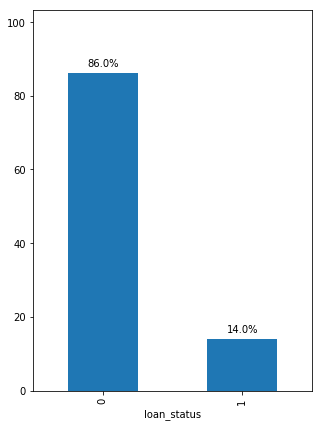

In [977]:
plt.figure(figsize=(5,7))
ax = round(100 * (loan_master.groupby('loan_status').loan_status.count())/len(loan_master),2).plot.bar()
showGraphLabels(ax)
plt.show()

Let's visualise the average default rates across categorical variables.

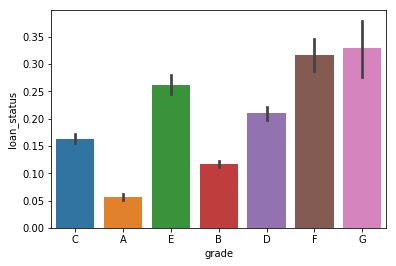

In [980]:
#Showing default rates across grade of the loan
plotCart('grade','loan_status',(6, 4),0)

Observation:

It clearly shows that as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is grouped by Lending Club based on the riskiness of the loan.

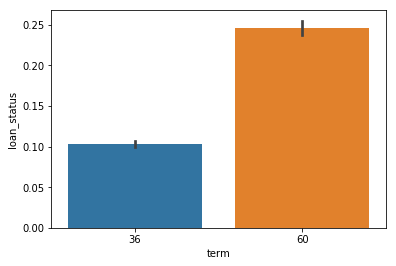

In [981]:
plotCart('term','loan_status',(6, 4),0)

Observation:
    
The above plot clearly shows that 60 months loans default is more than 36 months loans i.e. the more the term increases chances of default is also increase.

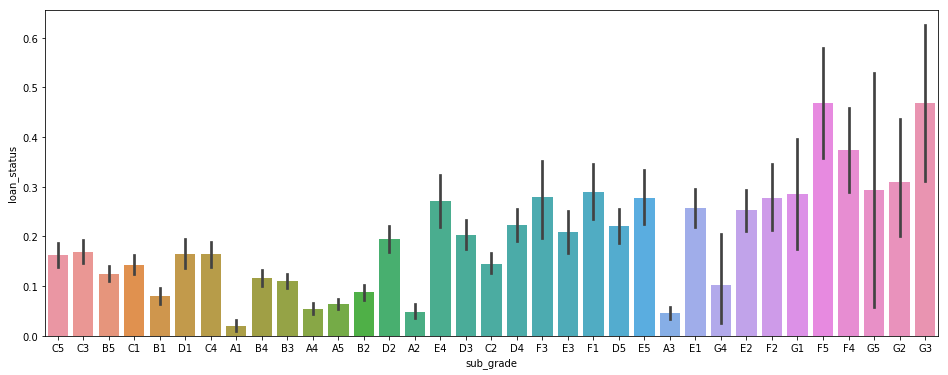

In [1035]:
plotCart('sub_grade','loan_status',(16, 6),0)

Observation

Above plot is showing the plot against sub-grade and loan_status, as expected A1 is better than A2 better than A3 and so on 

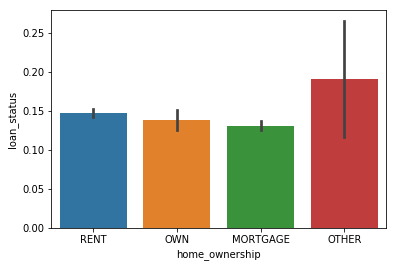

In [983]:
plotCart('home_ownership','loan_status',(6, 4),0)


Observation:
    
Above plot showing the vaariable 'Home ownership' is not a great discriminator

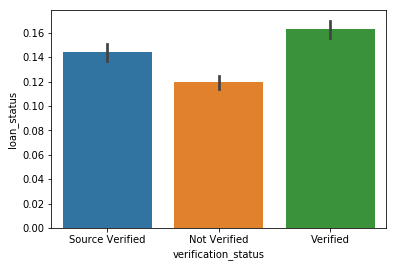

In [984]:
plotCart('verification_status','loan_status',(6, 4),0)

Observation:
    
The variable 'verification_status' surprisingly shows that the verified loans defaulted more than not verified.

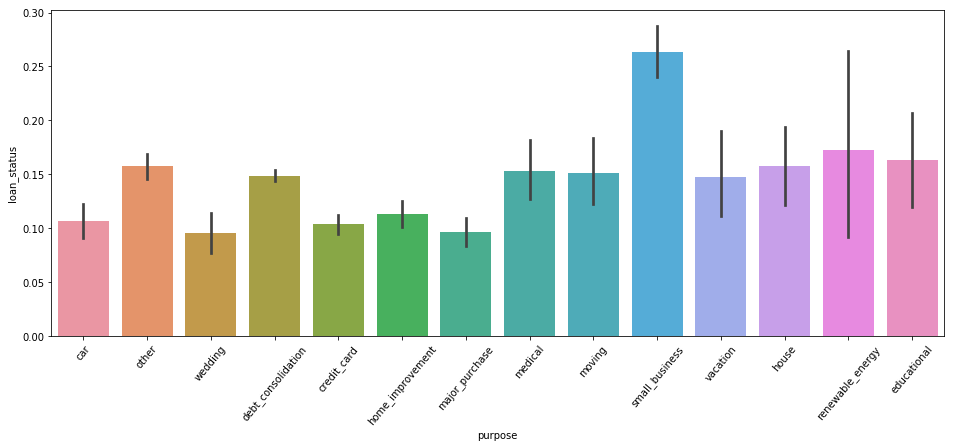

In [985]:
# Rotating the labels on X-axis to 50 to avoid overlapping
plotCart('purpose','loan_status',(16, 6),50)

Observation:
    
The variable 'purpose'shows that small business loans default the most, then renewable energy and education.

In [986]:
# Let's also observe the distribution of loans across years
loan_master['issue_d'].head()

1   2011-12-01
3   2011-12-01
5   2011-12-01
6   2011-12-01
7   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [987]:
# Let's observe the number of loans granted across years
loan_master.groupby('issue_d_year').issue_d_year.count()

issue_d_year
2007        6
2008     1053
2009     4423
2010    10795
2011    19090
Name: issue_d_year, dtype: int64

Observation:

We can see that the number of loans has increased steadily across years.

In [988]:
#Number of loans across months
loan_master.groupby('issue_d_month').issue_d_month.count()

issue_d_month
1     2048
2     2020
3     2395
4     2669
5     2745
6     2977
7     3115
8     3188
9     3276
10    3436
11    3678
12    3820
Name: issue_d_month, dtype: int64

Observation:

Most loans are granted in December, and in general in the latter half of the year.


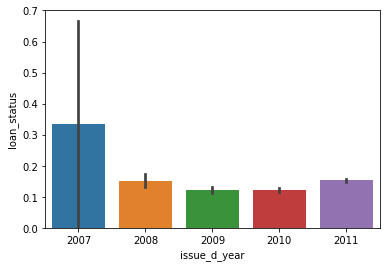

In [989]:
# Let's compare the default rates across years
plotCart('issue_d_year','loan_status',(6, 4),0)

Observation:

The default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010

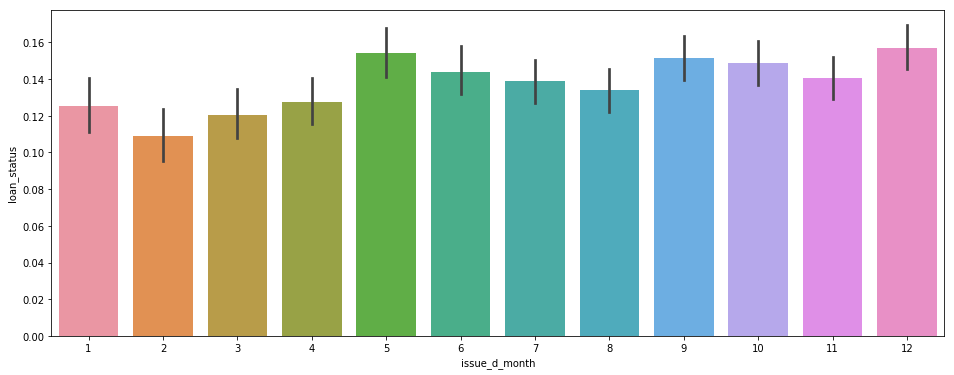

In [990]:
plotCart('issue_d_month','loan_status',(16, 6),0)

Observation:

Above plot shows comparision of default rates across the months, there is not much variation across months

Let's now analyse how the default rate varies across continuous variables.

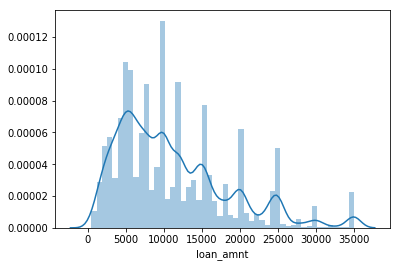

In [991]:
sns.distplot(loan_master['loan_amnt'])
plt.show()

Observation:
Above plot shows the variable 'loan_amnt' the median of loan amount is around 10,000

In [1038]:
#To analyse how default rates vary across continous variables, We can group the variables into discrete categories.
#Let's group the loan amount variable into small, medium, high, very high.
# binning loan amount
def loanAmount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan_master['loan_amnt_bin'] = loan_master['loan_amnt'].apply(lambda x: loanAmount(x))

In [993]:
loan_master['loan_amnt_bin'].value_counts()

medium       19068
high          7147
low           6611
very high     2541
Name: loan_amnt_bin, dtype: int64

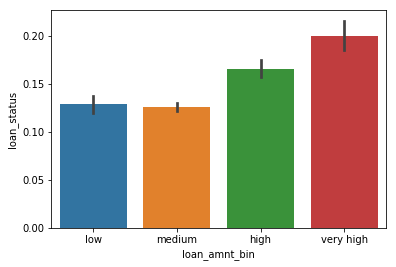

In [994]:
# Now, let's compare the default rates across loan amount type
plotCart('loan_amnt_bin','loan_status',(6, 4),0)

Observation:
    
From the above plot, We can infer that as the loan amount increase chances of default rate also increase.

In [1039]:
# lets also convert interest rate to low, medium, high
# Let's group loan amount
def intRate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
loan_master['int_rate_bin'] = loan_master['int_rate'].apply(lambda x: intRate(x))

In [996]:
# Debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan_master['dti_bin'] = loan_master['dti'].apply(lambda x: dti(x))

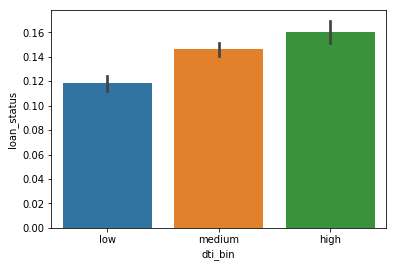

In [997]:
# comparing default rates across debt to income ratio
plotCart('dti_bin','loan_status',(6, 4),0)

Observation:

High dti translates into higher default rates, as expected

In [998]:
# Installment bining 
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan_master['installment_bin'] = loan_master['installment'].apply(lambda x: installment(x))

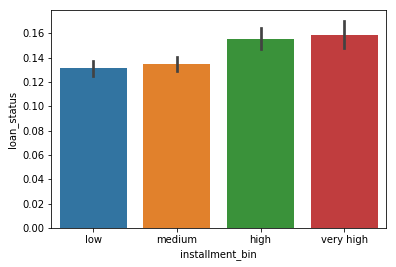

In [999]:
# comparing default rates across installment
plotCart('installment_bin','loan_status',(6, 4),0)

Observation:

The above plot shows that higher the installment amount, the higher the default rate

In [1000]:
#Annual income bining
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan_master['annual_inc_bin'] = loan_master['annual_inc'].apply(lambda x: annual_income(x))

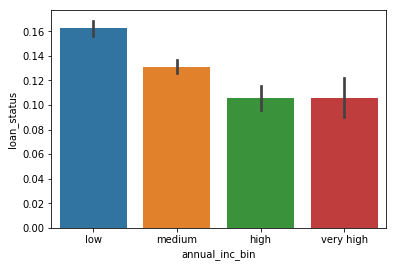

In [1001]:
# Annual income and default rate
plotCart('annual_inc_bin','loan_status',(6, 4),0)

Observation: 

From above plot we can infer that lower the annual income, higher the default rate

In [1002]:
#emp_length
def empLength(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan_master['emp_length_bin'] = loan_master['emp_length'].apply(lambda x: empLength(x))

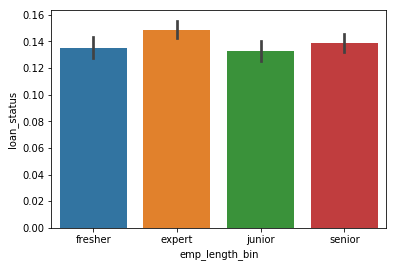

In [1003]:
#emp_length and default rate
plotCart('emp_length_bin','loan_status',(6, 4),0)

Observation:

We can not predict default rate from this plot as it is almost flat for this variable.

#### Other categorical variables distribution

Let's see how some other categorical variables of interest are distributed within the dataset

In [1004]:

def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showGraphLabels(ax)

    plt.tight_layout()

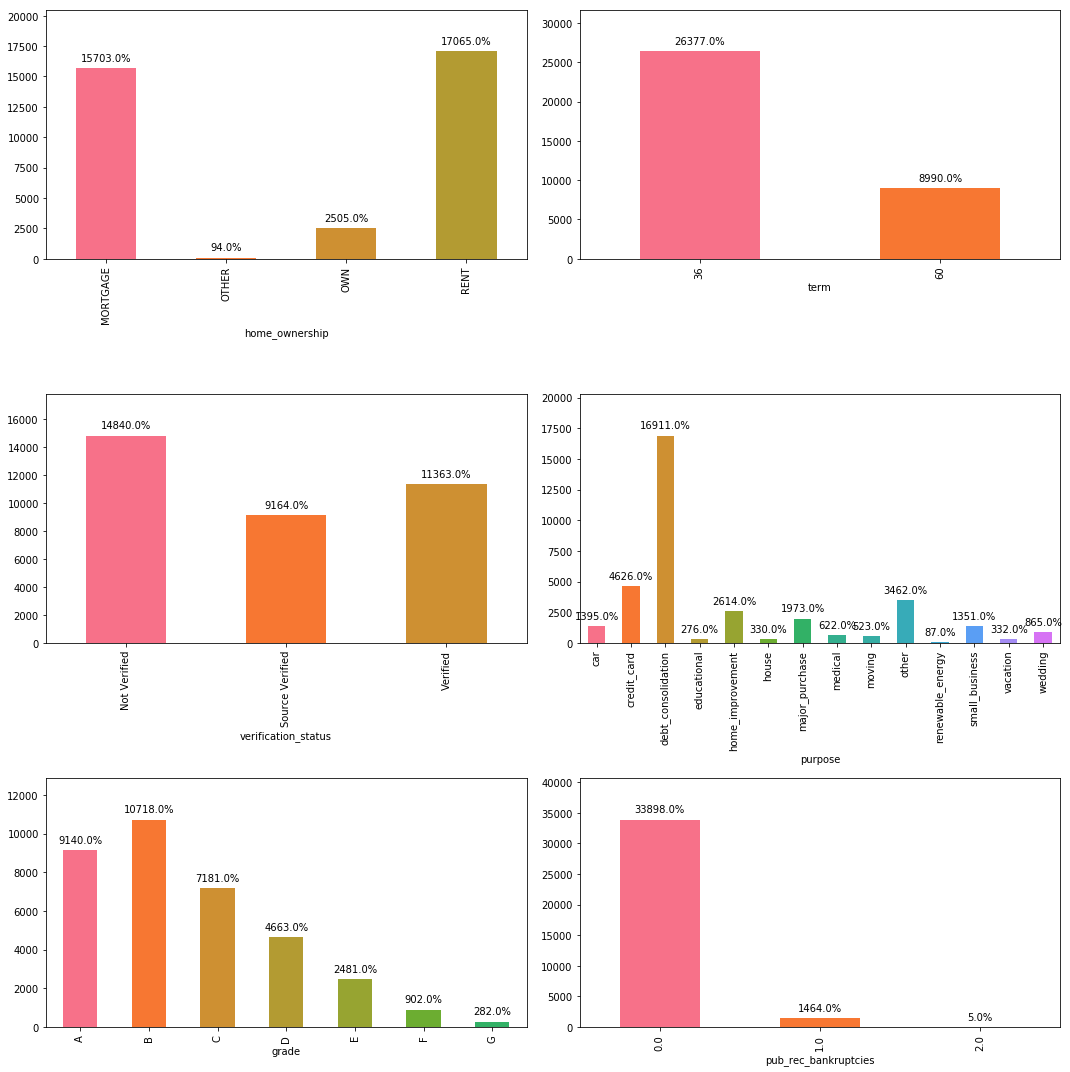

In [1005]:
plt.figure(figsize=(15,15))

categoricalBarPlots(loan_master, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

# Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.

Let's again have a look at the default rates across the purpose of the loan.

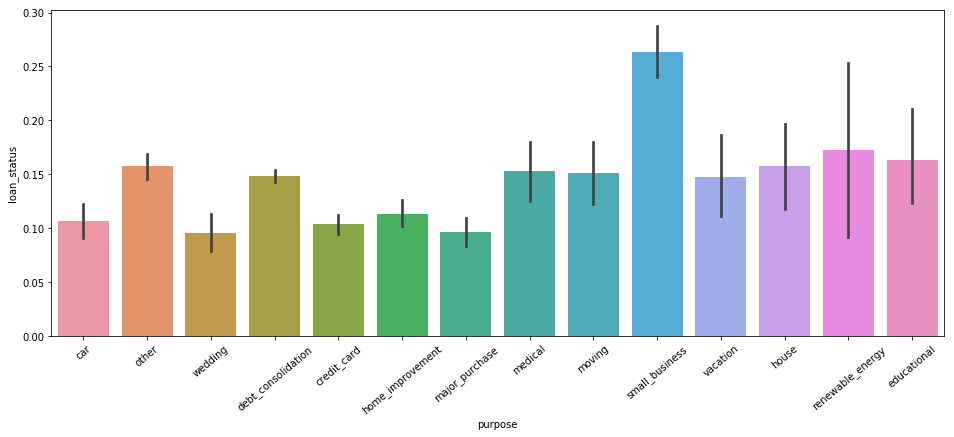

In [1006]:
plotCart('purpose','loan_status',(16, 6),40)

Observation:
    
From the above plot its clear that the loans taken by small businesses default the most and then renewable energy and education.

In the further analysis, we will segment the loan applications across the purpose of the loan, since this is a variable affecting many other variables like the type of applicant, interest rate, income, and finally the default rate.

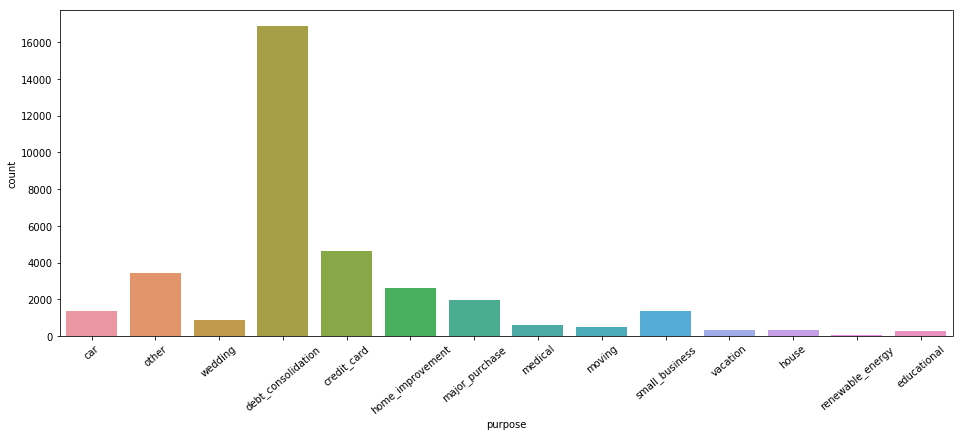

In [1007]:
# Lets first look at the number of loans for each type (purpose) of the loan
plt.figure(figsize = (16, 6))
plt.xticks(rotation = 40)
sns.countplot(x = 'purpose', data = loan_master)
plt.show()

Observation:
    
Above plots shows the most loans are taken for debt consolidation (to repay otehr debts), then credit card, major purchase etc.

Let's now analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [1008]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan_master = loan_master[loan_master['purpose'].isin(main_purposes)]
loan_master['purpose'].value_counts()

debt_consolidation    16911
credit_card            4626
home_improvement       2614
major_purchase         1973
Name: purpose, dtype: int64

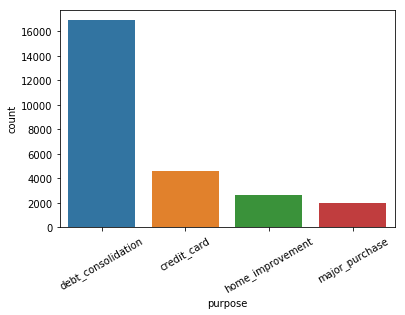

In [1009]:
# plotting number of loans by purpose 
sns.countplot(x =loan_master['purpose'])
plt.xticks(rotation=30)
plt.show()

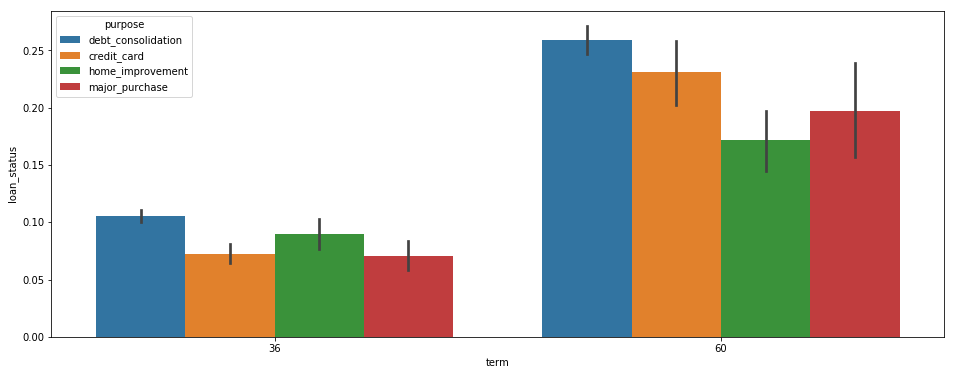

In [1010]:

# let's now compare the default rates across two types of categorical variables i.e. purpose of loan (constant) and another categorical variable (which changes)
plt.figure(figsize = (16, 6))
sns.barplot(x = 'term', y = "loan_status", hue = 'purpose', data = loan_master)
plt.show()

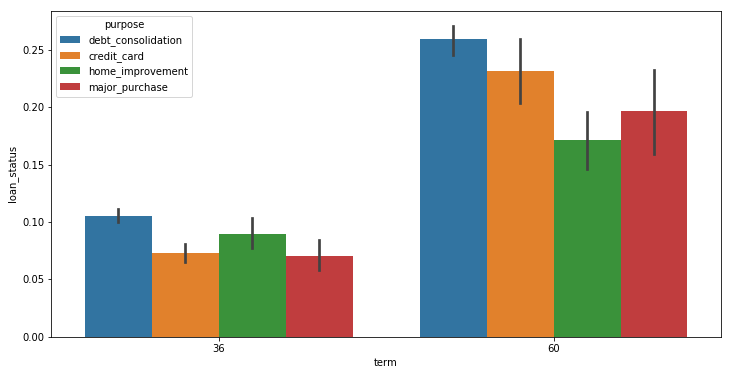

In [1011]:
# Lets write a function which takes a categorical variable and plots the default rate segmented by purpose 
def plotSegmented(cat_var):
    plt.figure(figsize=(12, 6))
    sns.barplot(x = cat_var, y = 'loan_status', hue='purpose', data = loan_master)
    plt.show()
    
plotSegmented('term')

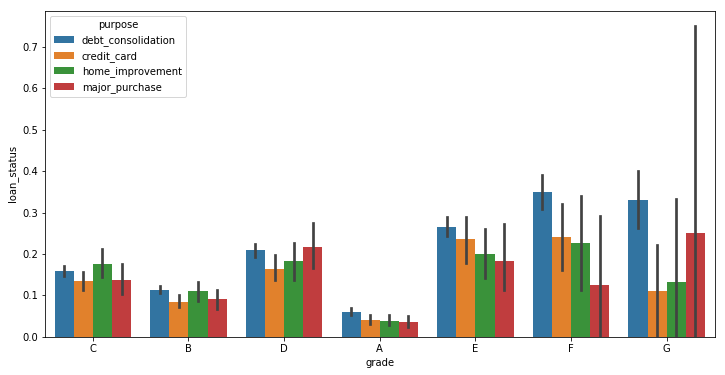

In [1012]:
# grade of loan
plotSegmented('grade')

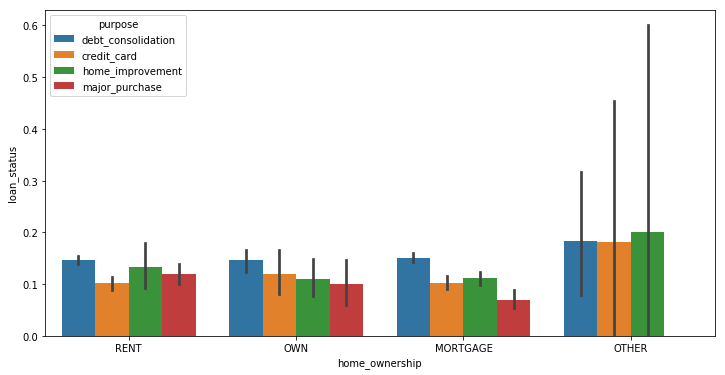

In [1013]:
# home ownership
plotSegmented('home_ownership')

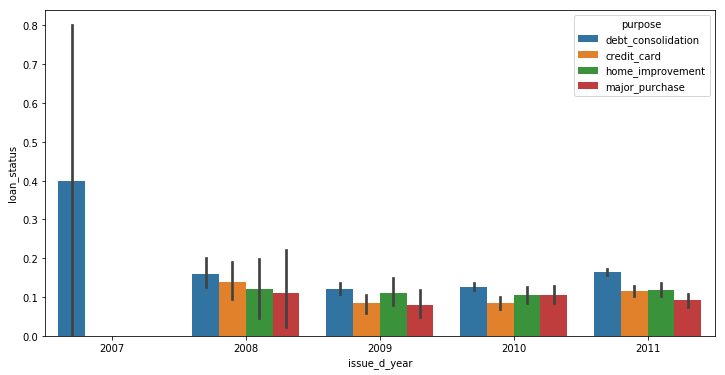

In [1014]:
# year
plotSegmented('issue_d_year')

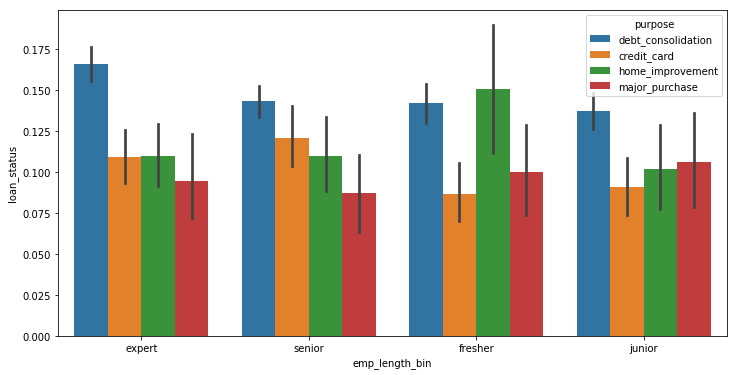

In [1015]:
# emp_length
plotSegmented('emp_length_bin')

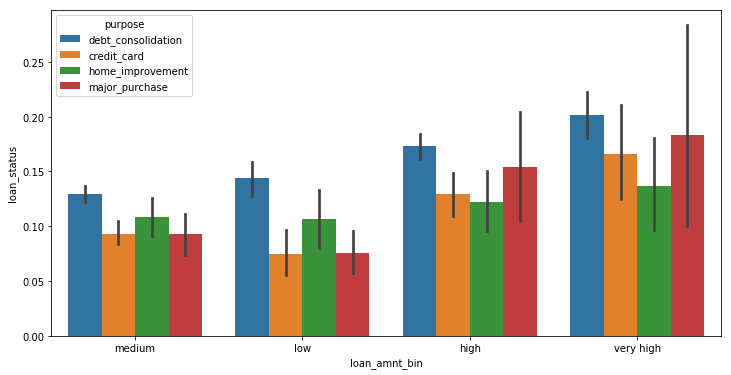

In [1016]:
# loan_amnt: same trend across loan purposes
plotSegmented('loan_amnt_bin')

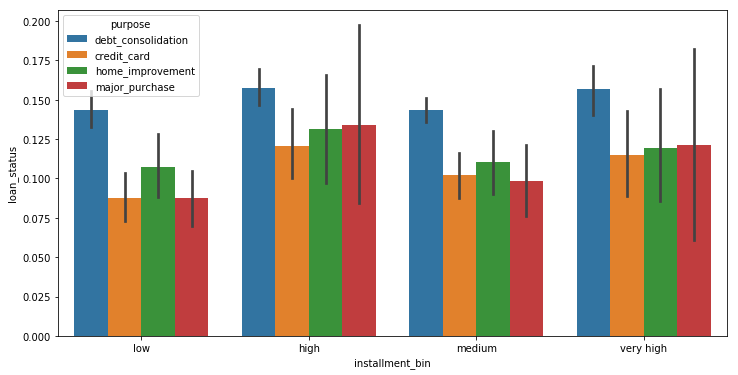

In [1017]:
# installment
plotSegmented('installment_bin')

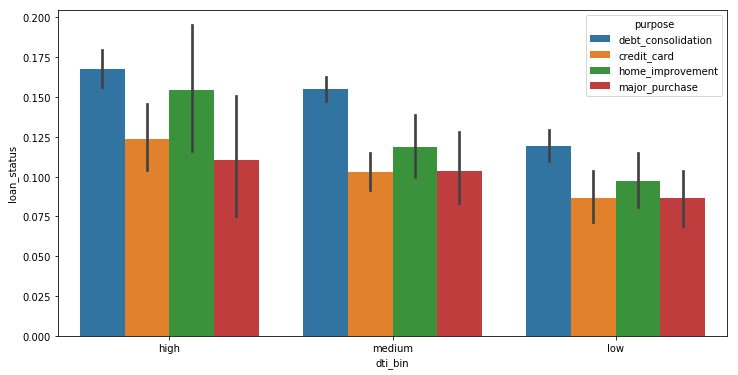

In [1018]:
# debt to income ratio
plotSegmented('dti_bin')

# Bivariate Analysis

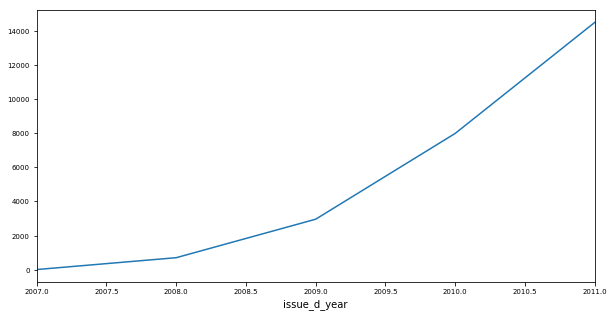

In [1019]:
#oan_amnt over time
plt.figure(figsize=(10,5))
loan_master.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

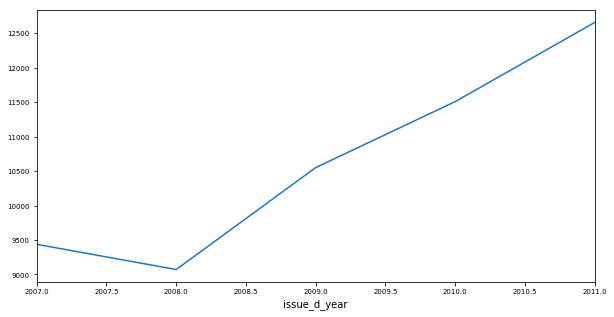

In [1020]:
#Avg. loan_amnt over time
plt.figure(figsize=(10,5))
loan_master.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

Observation:

Average loan amount dropped sharply when subprime mortgage crisis hit

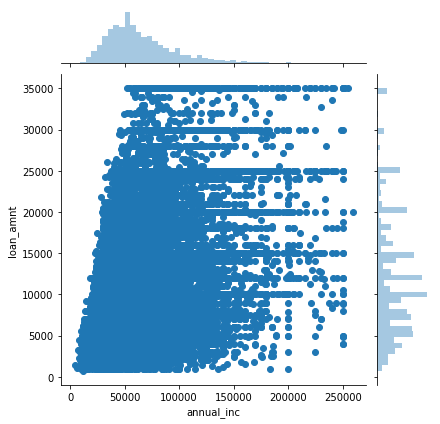

In [1021]:
#loan_amnt and annual_inc
sns.jointplot('annual_inc', 'loan_amnt', loan_master.loc[loan_master['annual_inc']<260000])
plt.show()

Observation:

It shows that there are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans.

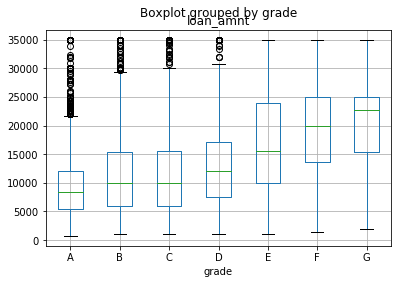

In [1022]:
#loan_amnt vs grade
loan_master.boxplot(column='loan_amnt', by='grade')
plt.show()

Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

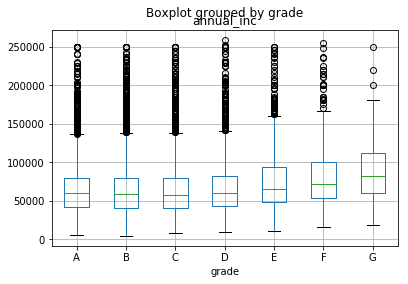

In [1023]:
#annual income with grade
loan_master.loc[loan_master['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

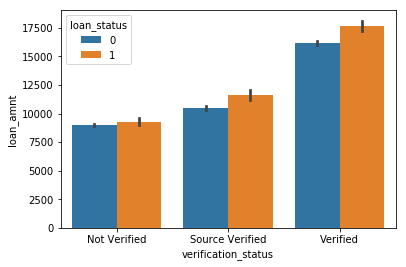

In [1024]:
#loan_amnt vs verification_status vs loan status
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_master, estimator=np.mean)

Observation:
Higher loan amounts are Verified more often.
We already know that larger loans are less in number, but see a higher charge off rate.

It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.

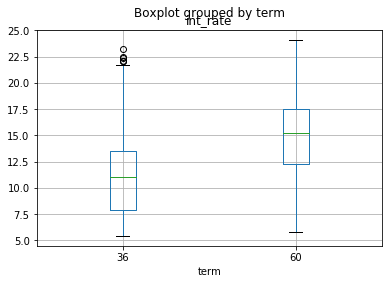

In [1025]:
#Interest Rate and Term
loan_master.boxplot(column='int_rate', by='term')
plt.show()


Observation:

Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

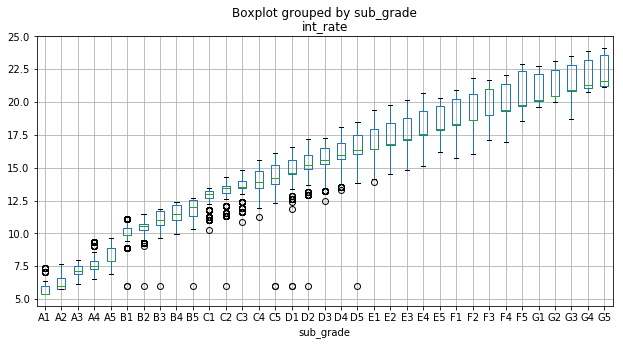

In [1026]:
#Interest Rate and Sub Grade
loan_master.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

Observation:

Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

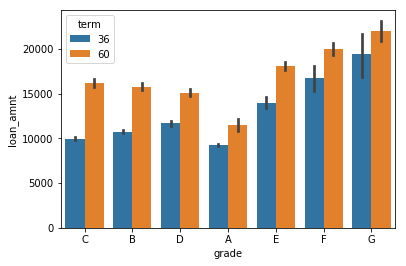

In [1027]:
#Loan amount vs Grade vs Term
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan_master, estimator=np.mean)
plt.show()

Observation:

Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

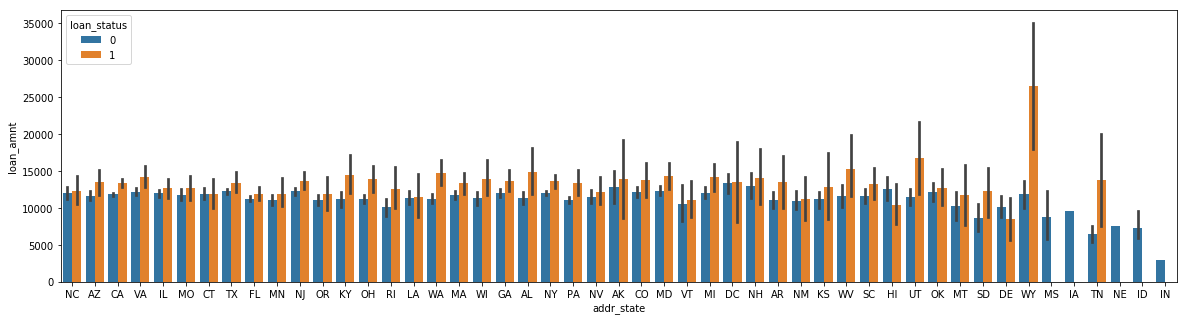

In [1028]:
#Loan amount Vs addr_state vs loan Status
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan_master, estimator=np.mean)
plt.show()

Observation:

States WY: Wyoming has the the highest average loan amount that was charged off. whats happening in this state is somthing LC can investigate into for this state.

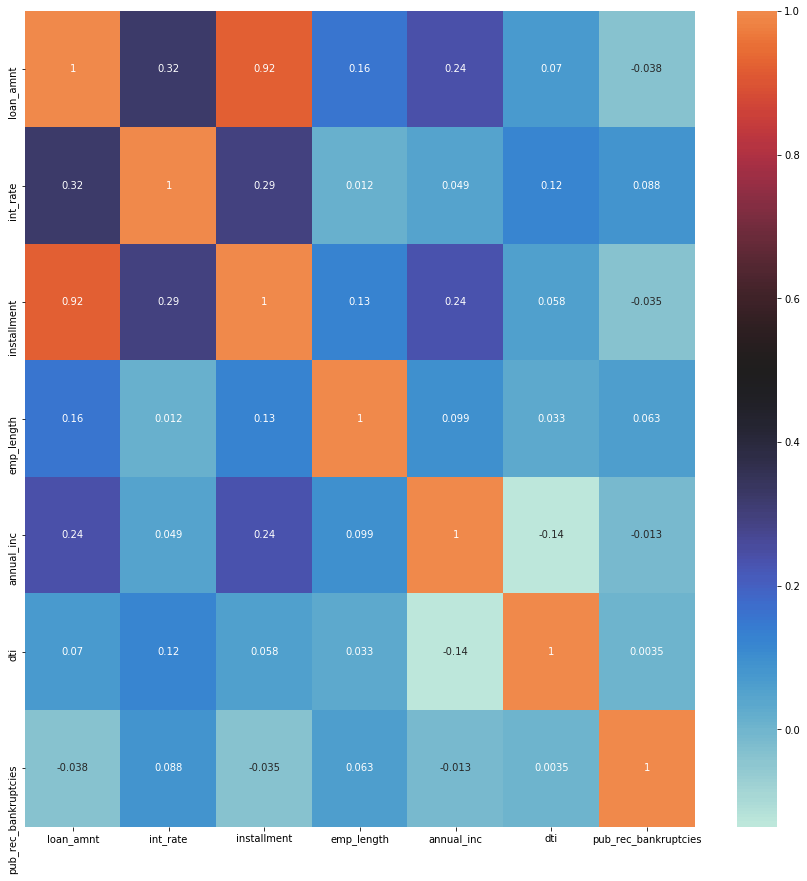

In [1029]:
plt.figure(figsize=(15,15))
cont_var = ['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc','dti', 'pub_rec_bankruptcies']
corr = loan_master[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

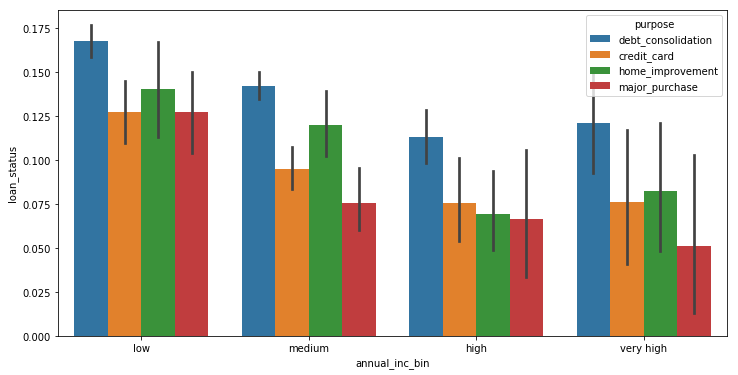

In [1030]:
# annual income
plotSegmented('annual_inc_bin')


A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'.

Let's see an example using annual_inc as the categorical variable.

In [1031]:
# variation of default rate across annual_inc
loan_master.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
4,080.00       1.00
48,804.00      1.00
52,610.00      1.00
52,538.00      1.00
120,999.84     1.00
52,518.72      1.00
52,302.00      1.00
52,164.00      1.00
52,116.00      1.00
51,873.00      1.00
51,871.00      1.00
51,690.48      1.00
51,654.36      1.00
122,708.00     1.00
51,449.00      1.00
51,432.00      1.00
51,204.00      1.00
123,531.24     1.00
51,170.00      1.00
51,063.00      1.00
50,582.00      1.00
50,307.36      1.00
50,172.00      1.00
49,989.00      1.00
49,960.00      1.00
49,772.64      1.00
49,632.00      1.00
49,590.00      1.00
126,600.00     1.00
49,068.00      1.00
128,004.00     1.00
52,852.00      1.00
52,999.96      1.00
120,366.05     1.00
55,635.00      1.00
113,328.00     1.00
57,780.00      1.00
57,180.00      1.00
57,120.00      1.00
57,068.00      1.00
57,043.00      1.00
56,820.00      1.00
56,791.00      1.00
56,600.00      1.00
56,300.00      1.00
115,872.00     1.00
56,000.04      1.00
55,963.00      1.00
55,536.00      1.00
53,102.00

In [1032]:
# one can write a function which takes in a categorical variable and computed the average default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the 
# categories, which is a decent metric indicating the effect of the varaible on default rate

def diffRate(cat_var):
    default_rates = loan_master.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diffRate('annual_inc_bin')
print(default_rates) 
print(diff)


annual_inc_bin
low         0.16
medium      0.13
very high   0.10
high        0.10
Name: loan_status, dtype: float64
0.06


Observation:

Thus, there is a 6% increase in default rate as you go from high to low annual income. We can compute this difference for all the variables and roughly identify the ones that affect default rate the most.

In [1033]:
# filtering all the object type variables
df_categorical = loan_master.loc[:, loan_master.dtypes == object]
df_categorical['loan_status'] = loan_master['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in loan_master.columns])

['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'total_pymnt', 'pub_rec_bankruptcies', 'earliest_cr_line_month', 'earliest_cr_line_year', 'issue_d_month', 'issue_d_year', 'loan_amnt_bin', 'int_rate_bin', 'dti_bin', 'installment_bin', 'annual_inc_bin', 'emp_length_bin']


In [1034]:
# storing the diff of default rates for each column in a dict
d = {key: diffRate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'term': 15.0, 'grade': 27.0, 'sub_grade': 45.0, 'emp_title': 100.0, 'home_ownership': 4.0, 'verification_status': 4.0, 'purpose': 5.0, 'title': 100.0, 'addr_state': 28.999999999999996, 'loan_amnt_bin': 7.000000000000001, 'int_rate_bin': 19.0, 'dti_bin': 5.0, 'installment_bin': 3.0, 'annual_inc_bin': 6.0, 'emp_length_bin': 2.0}
